# Proyecto final  || Manejo de Datos 



### Integrantes
   * García Hernández Andrea A.
   * López Aparicio Ángel
   * López Gonzalez Mariangely
   * Rosas León Diego
   
### Objetivo
El alumno aplicará los conocimientos teóricos vistos en el curso
realizando una aplicación con Python. Para ello diseñaran un web scraper el cuál
será capaz de extraer datos de 3 sitios web. Además, desarrollarán la habilidad de
trabajar en equipo con nuevos compañeros.







## Introducción

Este proyecto consiste en un webscrapper, herramienta que se encarga de extraer información de distintos sitios web, con el cual consultamos el nombre, precio, promociones de ciertos productos en 3 páginas distintas. El tema del que decidimos obtener la información antes mencionada fue papelería; así, los productos que estudiaremos son: crayolas, grapas, borrador, resaltador y regla. Las páginas web consultadas pertenecen a 3 de las compañías papeleras más importantes en México; Lumen, Office Depot y Office Max. 

Decidimos organizar la presentación del proyectos en 4 apartados:
 1. Funciones buscadoras 
 2. Main
 3. Gráficas
 4. Consultas

## Funciones buscadoras

In [33]:
# Importamos las paqueterías que usaremos
import pandas as pd
import pandasql as ps
import time 
import numpy as np
import re
from selenium import webdriver 
import matplotlib.pyplot as plt

In [34]:
# Con una variable auxiliar, creamos un DataFrame para cada tienda
# y lo pasamos a formato excel, borrando el pseudo-índice
aux=pd.DataFrame()

aux.to_excel("df_lumen.xlsx",index=False)
aux.to_excel("df_officedepot.xlsx",index=False)
aux.to_excel("df_officemax.xlsx",index=False)

A continuación se declaran las funciones correspondientes a cada tienda, siguiendo el formato propuesto por el ayudante Sergio.

In [35]:
########### Papelería "Lumen" ###########
def Buscador_Precios_Selenium_Lumen(producto):
    """
    Función que recibe un producto
    y extrae los artículos de
    la pagina web de la papelería Lumen

      Parámetros:
        -producto (str)

      Regresa:
        -df_lumen (DataFrame)

    """
    
    ### Ingresamos a la pagina web
    ### El directorio del webdriver varía de
    ### computadora a computadora; se debe 
    ### actualizar dependiendo donde esté 
    ### almacenado.
    path ="/Users/diego.rl/webdriver3/chromedriver"
    driver=webdriver.Chrome(path)
    url= "https://lumen.com.mx/search?q="+producto
    driver.get(url)
    
   
    
    ####### Accedemos a los elementos que contienen 
    ####### los datos que queremos de la pagina web 
    
    productos= driver.find_elements_by_class_name("item-box")

    ### Accedemos a las url's almacenadas en la variable productos
    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(
                productos[i].find_element_by_tag_name(
                    "a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
            
    ### Accedemos a los nombres de los productos

    lista_nombres=list()
    for i in range(len(productos)):
        try:
            # La sintáxis cuando un producto tiene descuento, cambia
            # para ello, hacemos un if-else que separe 
            # los productos con descuento
            if "%" in productos[i].text.split("\n")[0]:
                lista_nombres.append(productos[i].text.split("\n")[1])
            else:
                lista_nombres.append(productos[i].text.split("\n")[0])
        except:
            lista_nombres.append(np.nan)
            
    ### Accedemos a los precios base y promos de los productos 

    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            if "%" in productos[i].text.split("\n")[0]:
                lista_precios.append(
                    productos[i].text.split("\n")[4].split(" ")[0])
            else: 
                lista_precios.append(
                    productos[i].text.split("\n")[3])
        except:
            lista_precios.append(np.nan)
        try:
            if "%" in productos[i].text.split("\n")[0]:
                lista_promos.append(
                    productos[i].text.split("\n")[4].split(" ")[1])
            else:
                lista_promos.append(
                    productos[i].text.split("\n")[4])
        except:
            lista_promos.append(np.nan)


    # Guardamos los datos recabado en el DF
    df_lumen =pd.DataFrame({"nombre":lista_nombres,"url":lista_urls,
                            "precio_promocion":lista_promos,
                            "precio_original":lista_precios})
    df_lumen["autoservicio"]="Lumen"
    df_lumen["marca"]= producto
    df_lumen["fecha"]= time.strftime("%d/%m/%y")

    df_lumen = df_lumen[["fecha","autoservicio",
                         "marca","nombre","url",
                         "precio_promocion","precio_original"]]
    ## este filtro apenas se agrega
    ## Guardamos los datos en el excel creado previamente
    ## primero leyendo el archivo, y luego lo guarda
    ## nuevamente en el Excel

    df_lumen  =df_lumen.reset_index(drop=True)

    datos_webscraper=pd.read_excel("df_lumen.xlsx")

    datos_webscraper= pd.concat([datos_webscraper,df_lumen],axis=0)

    datos_webscraper.to_excel("df_lumen.xlsx",index=False)
    
    # Al final de cada búsqueda cerramos Chrome
    driver.quit()
    return df_lumen

In [36]:
########### Papelería "Office Depot" ###########
def Buscador_Precios_Selenium_OfficeDepot(producto):
    """
    Función que recibe un producto
    y extrae los artículos de
    la pagina web de la papelería Office Depot

      Parámetros:
        -producto (str)

      Regresa:
        -df_officedepot (DataFrame)
        
    """
    
    ### Ingresamos a la pagina web
    ### El directorio del webdriver varía de
    ### computadora a computadora; se debe 
    ### actualizar dependiendo donde esté 
    ### almacenado.
    path = "/Users/diego.rl/webdriver3/chromedriver"
    url = "https://www.officedepot.com.mx/officedepot/en/search/?text="
    ## Creamos el url al que se quiere acceder, 
    ## sólo observando el link base de la página
    productoc = producto.replace(" ","+")
    url = url+productoc

    ### Accedemos a la página web deseada
    
    driver = webdriver.Chrome(path)
    driver.get(url)   
    
    ####### Accedemos a los elementos que contienen 
    ####### los datos que queremos de la pagina web 
    
    productos= driver.find_elements_by_class_name("product-item")
    ### Accedemos a las url's almacenadas en la variable productos
    
    lista_urls = list()
    ### Obtenemos los URL'S de productos    
    for i in range(len(productos)):
        try:
            lista_urls.append(
                productos[i].find_element_by_tag_name(
                    "a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)

    ### Accedemos a los nombres de los productos

    lista_nombres = list()
    ### Obtenemos los nombres de productos
    for i in range(len(productos)):
        try:
            if "%" in productos[i].text.split("\n")[0]:
                lista_nombres.append(productos[i].text.split("\n")[2])
            elif "SKU" not in productos[i].text.split("\n")[0]:
                lista_nombres.append(productos[i].text.split("\n")[2])
            else:
                lista_nombres.append(productos[i].text.split("\n")[1])
        except:
            lista_nombres.append(np.nan)
            

    ### Accedemos a los precios base y promos de los productos 

    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            if "%" in productos[i].text.split("\n")[0]:
                lista_precios.append(productos[i].text.split("\n")[3])
            elif "SKU" not in productos[i].text.split("\n")[0]:
                lista_precios.append(productos[i].text.split("\n")[3])
            else: 
                lista_precios.append(productos[i].text.split("\n")[2])
        except:
            lista_precios.append(np.nan)
        try:
            if "%" in productos[i].text.split("\n")[0]:
                lista_promos.append(productos[i].text.split("\n")[4])
            elif "SKU" not in productos[i].text.split("\n")[0]:
                lista_promos.append(np.nan)
            else:
                lista_promos.append(np.nan)
        except:
            lista_promos.append(np.nan)
            
    # Guardamos los datos recabado en el DF
    df_officedepot =pd.DataFrame({"nombre":lista_nombres,"url":lista_urls,
                                  "precio_promocion":lista_promos,
                                  "precio_original":lista_precios})
    df_officedepot["autoservicio"]="Office Depot"
    df_officedepot["marca"]= producto
    df_officedepot["fecha"]= time.strftime("%d/%m/%y")
    df_officedepot = df_officedepot[["fecha","autoservicio",
                             "marca","nombre","url",
                             "precio_promocion","precio_original"]]
        ## este filtro apenas se agrega

    ## Guardamos los datos en el excel creado previamente
    ## primero leyendo el archivo, y luego lo guarda
    ## nuevamente en el Excel
    df_officedepot  =df_officedepot.reset_index(drop=True)

    datos_webscraper=pd.read_excel("df_officedepot.xlsx")

    datos_webscraper= pd.concat([datos_webscraper,df_officedepot],axis=0)

    datos_webscraper.to_excel("df_officedepot.xlsx",index=False)

    # Al final de cada búsqueda cerramos Chrome
    driver.quit()
    return df_officedepot

In [37]:
########### Papelería "Office Max" ###########
def Buscador_Precios_Selenium_OfficeMax(producto):
    """
    Función que recibe un producto
    y extrae los artículos de
    la pagina web de la papelería Office Max

      Parámetros:
        -producto (str)

      Regresa:
        -df_officemax (DataFrame)

    """
    
    ### Ingresamos a la pagina web
    ### El directorio del webdriver varía de
    ### computadora a computadora; se debe 
    ### actualizar dependiendo donde esté 
    ### almacenado.
    path = "/Users/diego.rl/webdriver3/chromedriver"
    url = "https://www.officemax.com.mx/"
    ## Creamos el url al que se quiere acceder, 
    ## sólo observando el link base de la página
    productoc = producto.replace(" ","%20")
    url = url+productoc

    ### Accedemos a la página web deseada
    
    driver = webdriver.Chrome(path)
    driver.get(url)   
    
    ####### Accedemos a los elementos que contienen los datos
    ####### que queremos de la pagina web 
    
    productos= driver.find_elements_by_class_name("product-item__info")
    ### Accedemos a las urls almacenadas en la variable productos
    
    lista_urls = list()
    ### Obtenemos los URL'S de productos    
    for i in range(len(productos)):
        try:
            lista_urls.append(
                productos[i].find_element_by_tag_name(
                    "a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)

    ### Accedemos a los nombres de los productos

    lista_nombres = list()
    ### Obtenemos los nombres de productos
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].text.split("\n")[0])
        except:
            lista_nombres.append(np.nan)
            

    ### Accedemos a los precios base y promo de los productos 

    lista_precios = list()
    lista_promos = list()

    ### Obtenemos los precios normales y promocionales de productos 
    for i in range(len(productos)):
        lista_precios.append(productos[i].text.split("\n")[1])
        if (len(productos[i].text.split("\n")) == 4):
            lista_promos.append(productos[i].text.split("\n")[2])
        else:        
            lista_promos.append(np.nan)


    # Creamos un DataFrame donde juntemos las listas creadas

    df_officemax =pd.DataFrame({"nombre":lista_nombres,"url":lista_urls,
                            "precio_promocion":lista_promos,
                            "precio_original":lista_precios})
    df_officemax["autoservicio"]="Office Max"
    df_officemax["marca"]= producto
    df_officemax["fecha"]= time.strftime("%d/%m/%y")

    df_officemax = df_officemax[["fecha","autoservicio",
                         "marca","nombre","url",
                         "precio_promocion","precio_original"]]
    ## este filtro apenas se agrega
    ## Guardamos los datos en el excel creado previamente
    ## primero leyendo el archivo, y luego lo guarda
    ## nuevamente en el Excel

    df_officemax  =df_officemax.reset_index(drop=True)

    datos_webscraper=pd.read_excel("df_officemax.xlsx")

    datos_webscraper= pd.concat([datos_webscraper,df_officemax],axis=0)

    datos_webscraper.to_excel("df_officemax.xlsx",index=False)

    # Al final de cada búsqueda cerramos Chrome
    driver.quit()
    return df_officemax

Posteriormente, tenemos la función que convierte las cadenas de los precios, en valores numéricos (floats).

In [38]:
def precios_floats(datos,archivo):
    """
    Función que convierte strings
    en valores numéricos, de acuerdo 
    al formato previamente conocido 
    de cada página
      Parámetros:
        -datos (DF)
        -archivo (str)
      Regresa:
        -datos (xlsx)
    """
        
    #### Eliminamos el signo de pesos ($) de ambas columnas
    ### de precio_original y precio_promocion
    
    for i in range(len(datos["precio_promocion"])):
        try:
            datos["precio_promocion"].iloc[i]=datos[
                "precio_promocion"].iloc[i].strip("$")
        except:
            pass
        
    for i in range(len(datos["precio_original"])):
        try:
            datos["precio_original"].iloc[i]=datos[
                "precio_original"].iloc[i].strip("$")
        except:
            pass
        
    
    ### Quitamos la separacion de comas para miles
    
    datos["precio_promocion"]=datos[
        "precio_promocion"].replace(",","",regex=True)
    
    datos["precio_original"]=datos[
        "precio_original"].replace(",","",regex=True)
    
     
    
    ### Quitamos las letras MXN
    
    datos["precio_promocion"]=datos[
        "precio_promocion"].replace(" MXN","",regex=True)
    
    datos["precio_original"]=datos[
        "precio_original"].replace(" MXN","",regex=True)
    
        
    ### Convertimos los precios a numéricos    
    datos['precio_promocion'] = pd.to_numeric(
        datos['precio_promocion'], errors='coerce')
    
    datos['precio_original'] = pd.to_numeric(
        datos['precio_original'], errors='coerce')

    datos.to_excel(archivo,index=False)
        
    return datos


## Main

Finalmente ejecutamos las funciones previamente creadas, con un ciclo for
para que busque todos los productos en una misma línea.

In [39]:
for productos in [
        "crayolas","grapas","borrador", "resaltador", "regla"]:
    Buscador_Precios_Selenium_Lumen(productos)
    Buscador_Precios_Selenium_OfficeDepot(productos)
    Buscador_Precios_Selenium_OfficeMax(productos)
    
# Leemos los respectivos excels creados al
# principio del código, que ya contienen
# los datos recabados
df_officedepot=pd.read_excel("df_officedepot.xlsx")
df_lumen=pd.read_excel("df_lumen.xlsx")
df_officemax = pd.read_excel("df_officemax.xlsx")

# Para cada tienda, convertimos sus precios
precios_floats(df_lumen, "df_lumen_limpio.xlsx")
df_lumen=pd.read_excel("df_lumen_limpio.xlsx")
df_lumen

precios_floats(df_officedepot, "df_officedepot_limpio.xlsx")
df_officedepot=pd.read_excel("df_officedepot_limpio.xlsx")
df_officedepot

precios_floats(df_officemax, "df_officemax_limpio.xlsx")
df_officemax=pd.read_excel("df_officemax_limpio.xlsx")
df_officemax

# Finalmente concatenamos los DataFrames en uno solo,
# que contendra la información de las tres tiendas
df_final= pd.concat([df_lumen, df_officedepot, df_officemax],axis=0, 
                    ignore_index=True, 
                    sort=True, verify_integrity=False )
df_final.to_excel("df_final.xlsx", index = False)
df_final


/var/folders/n3/_nzkygk544n7cpt7njtwq5nm0000gn/T/ipykernel_14810/4213291375.py:22: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
/var/folders/n3/_nzkygk544n7cpt7njtwq5nm0000gn/T/ipykernel_14810/4213291375.py:31: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("item-box")
/Users/diego.rl/opt/anaconda3/lib/python3.8/site-packages/selenium/webdriver/remote/webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
/var/folders/n3/_nzkygk544n7cpt7njtwq5nm0000gn/T/ipykernel_14810/907098582.py:30: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)
/var/folders/n3/_nzkygk544n7cpt7njtwq5nm0000gn/T/ipykernel_1

,autoservicio,fecha,marca,nombre,precio_original,precio_promocion,url
0,Lumen,27/01/22,crayolas,CRAYONES PAPER MATE FANTASY GEL CON 12,170.0,NaN,https://lumen.com.mx/crayones-paper-mate-fanta...
1,Lumen,27/01/22,crayolas,CRAYONES CRAYOLA 0328 JUMBO CON 28,126.0,NaN,https://lumen.com.mx/crayones-crayola-0328-jum...
2,Lumen,27/01/22,crayolas,CRAYONES JOVI HEXAGONALES PLÁSTICOS,115.0,NaN,https://lumen.com.mx/crayones-jovi-hexagonales...
3,Lumen,27/01/22,crayolas,CRAYONES CRAYOLA 0048 CON 48,108.0,NaN,https://lumen.com.mx/crayones-crayola-0048-con...
4,Lumen,27/01/22,crayolas,CRAYONES JOVI TRIWAX CON 12,103.0,NaN,https://lumen.com.mx/crayones-jovi-triwax-con-...
...,...,...,...,...,...,...,...
248,Office Max,27/01/22,regla,"Regla T Madera, Cabeza Fija, 2 Espigas, 75 Cm,...",429.0,NaN,https://www.officemax.com.mx/regla-t-madera-ca...
249,Office Max,27/01/22,regla,Regla De Aluminio De 30Cm Omx,18.9,NaN,https://www.officemax.com.mx/regla-de-aluminio...
250,Office Max,27/01/22,regla,"Regla Twistn Flexible, 30Cm, Colores Surtidos,...",34.9,NaN,https://www.officemax.com.mx/regla-twistn-flex...
251,Office Max,27/01/22,regla,"Regla T Acrilico, 60Cm, Cabeza Fija,Grad, Col ...",129.0,NaN,https://www.officemax.com.mx/regla-t-acrilico-...


##Gráficas

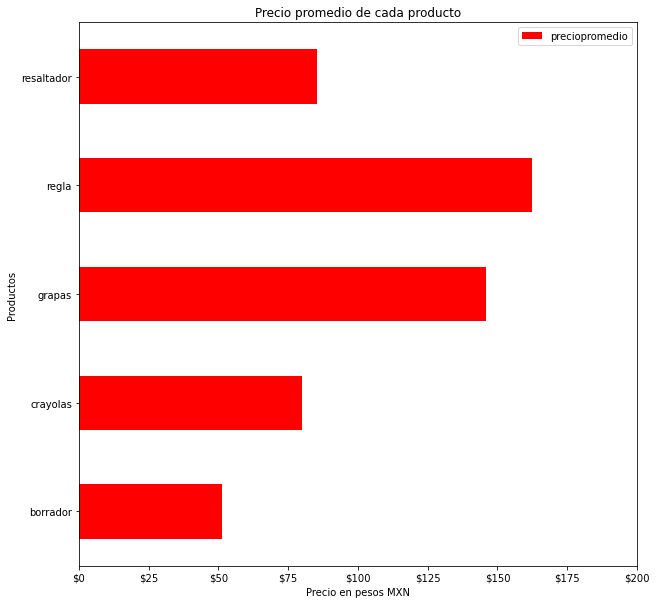

In [43]:
# GRÁFICA 1. PRECIOS PROMEDIOS
sql1 = ps.sqldf(
    "select marca,avg(precio_original) as \
        preciopromedio from df_final group by marca")
grafica1 = sql1.plot("marca", "preciopromedio",
                     kind="barh", color="red")
plt.title("Precio promedio de cada producto")
plt.ylabel("Productos")
plt.xticks([0,25,50,75,100,125,150,175,200],
           ["$0","$25","$50","$75","$100","$125","$150","$175","$200"])
plt.xlabel("Precio en pesos MXN")
plt.show()

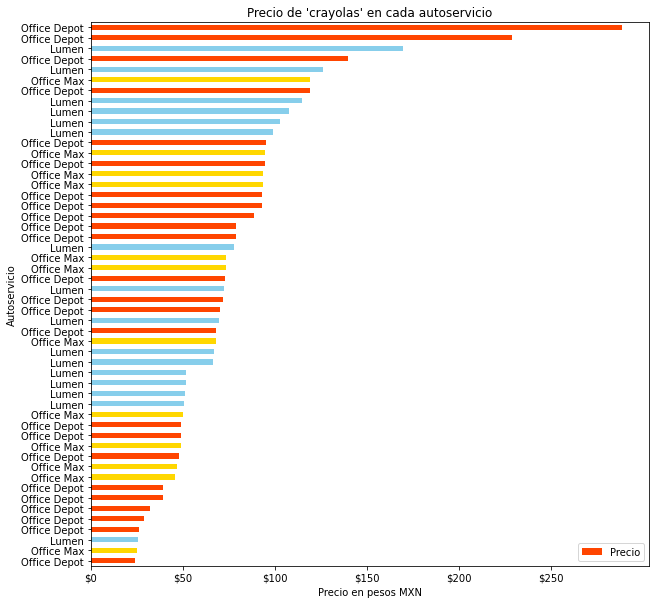

In [41]:
# GRÁFICA 2. PRECIO CRAYOLAS
sql2 = ps.sqldf(
    "select marca, autoservicio, precio_original as 'Precio' \
        from df_final where (marca='crayolas' and precio_original\
                             is not null) order by precio_original")
sql2
colores = []
for i in sql2["autoservicio"]:
    if i =="Lumen":
        colores.append("skyblue")
    elif i =="Office Depot":
        colores.append("orangered")
    elif i == "Office Max":
        colores.append("gold")
        
grafica2 = sql2.plot("autoservicio", "Precio", 
                     kind="barh", color=colores)
plt.title("Precio de 'crayolas' en cada autoservicio")
plt.ylabel("Autoservicio")
plt.xticks([0,50,100,150,200,250],
           ["$0","$50","$100","$150","$200", "$250"])
plt.xlabel("Precio en pesos MXN")
plt.rcParams["figure.figsize"] = (17,15)
plt.show()

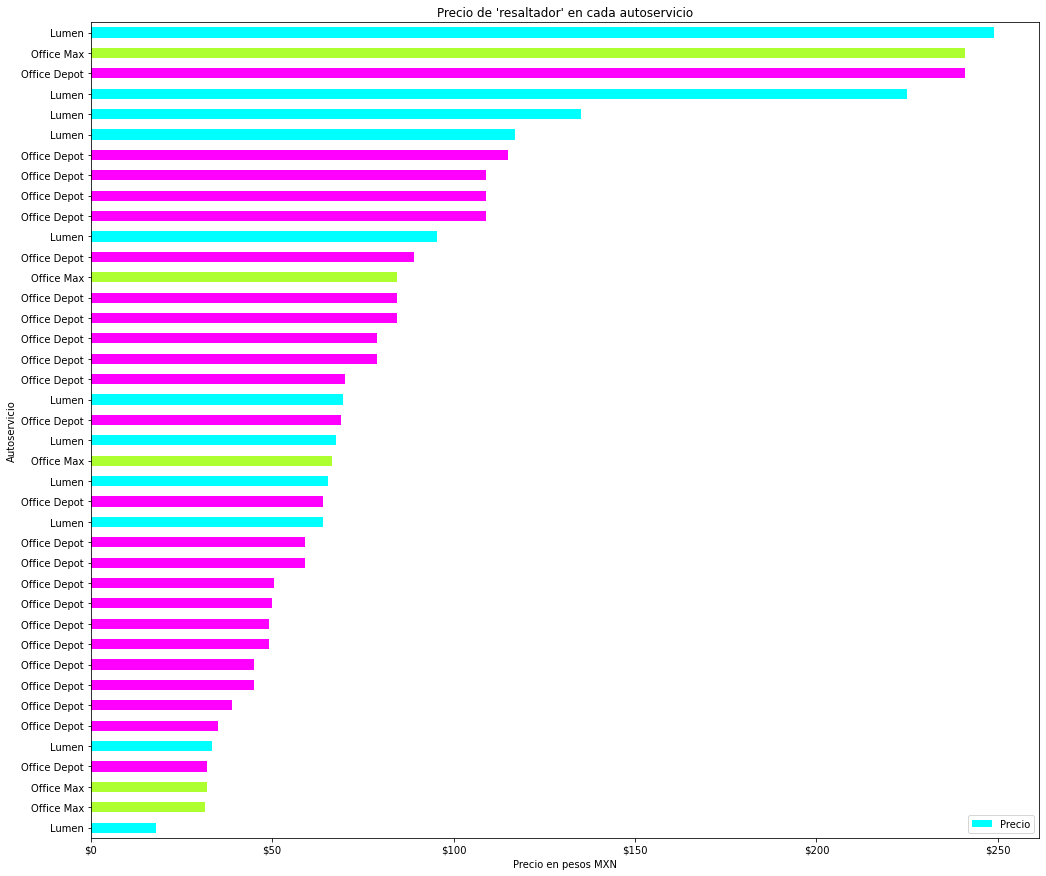

In [42]:
# GRÁFICA 3. PRECIO RESALTADORES
sql3 = ps.sqldf(
    "select marca, autoservicio, precio_original as 'Precio' \
        from df_final where (marca='resaltador' and precio_original \
                             is not null) order by precio_original")
sql3
colores = []
for i in sql3["autoservicio"]:
    if i =="Lumen":
        colores.append("cyan")
    elif i =="Office Depot":
        colores.append("magenta")
    elif i == "Office Max":
        colores.append("greenyellow")
grafica3 = sql3.plot("autoservicio", "Precio", 
                     kind="barh", color=colores)
plt.title("Precio de 'resaltador' en cada autoservicio")
plt.ylabel("Autoservicio")
plt.xticks([0,50,100,150,200,250],
           ["$0","$50","$100","$150","$200", "$250"])
plt.xlabel("Precio en pesos MXN")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

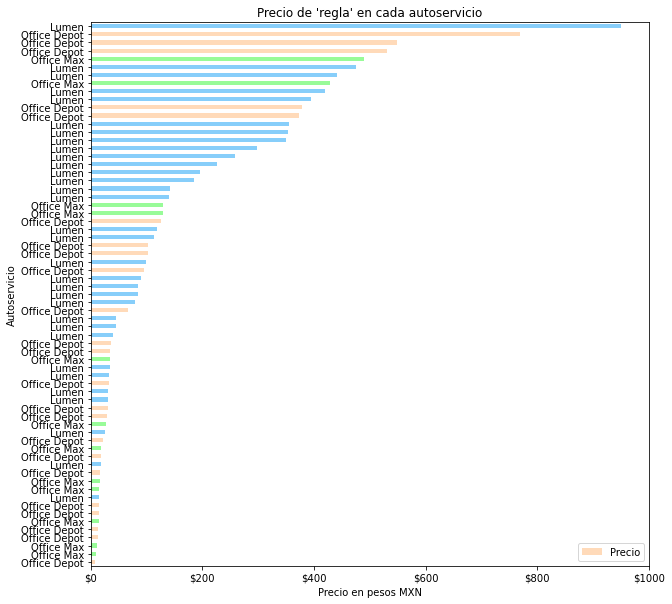

In [29]:
# GRÁFICA 4. PRECIO REGLAS
sql4 = ps.sqldf(
    "select marca, autoservicio, precio_original as 'Precio' \
        from df_final where (marca='regla' and precio_original \
                             is not null) order by precio_original")
sql4
colores = []
for i in sql4["autoservicio"]:
    if i =="Lumen":
        colores.append("lightskyblue")
    elif i =="Office Depot":
        colores.append("peachpuff")
    elif i == "Office Max":
        colores.append("palegreen")
grafica4 = sql4.plot("autoservicio", "Precio", 
                     kind="barh", color=colores)
plt.title("Precio de 'regla' en cada autoservicio")
plt.ylabel("Autoservicio")
plt.xlabel("Precio en pesos MXN")
plt.xticks([0,200,400,600,800,1000],
           ["$0","$200","$400","$600","$800", "$1000"])
plt.rcParams["figure.figsize"] = (10,10)
plt.show()



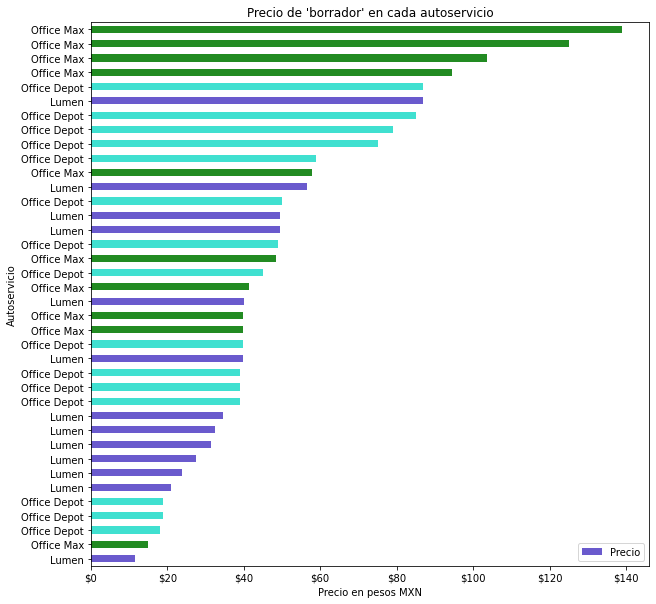

In [30]:
# GRÁFICA 5. PRECIO BORRADORES
sql5 = ps.sqldf(
    "select marca, autoservicio, precio_original as 'Precio' \
        from df_final where (marca='borrador' and precio_original \
                             is not null) order by precio_original")
sql5
colores = []
for i in sql5["autoservicio"]:
    if i =="Lumen":
        colores.append("slateblue")
    elif i =="Office Depot":
        colores.append("turquoise")
    elif i == "Office Max":
        colores.append("forestgreen")
grafica5 = sql5.plot("autoservicio", "Precio", 
                     kind="barh", color=colores)
plt.title("Precio de 'borrador' en cada autoservicio")
plt.ylabel("Autoservicio")
plt.xlabel("Precio en pesos MXN")
plt.xticks([0,20,40,60,80,100, 120, 140],
           ["$0","$20","$40","$60","$80", "$100", "$120", "$140"])
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

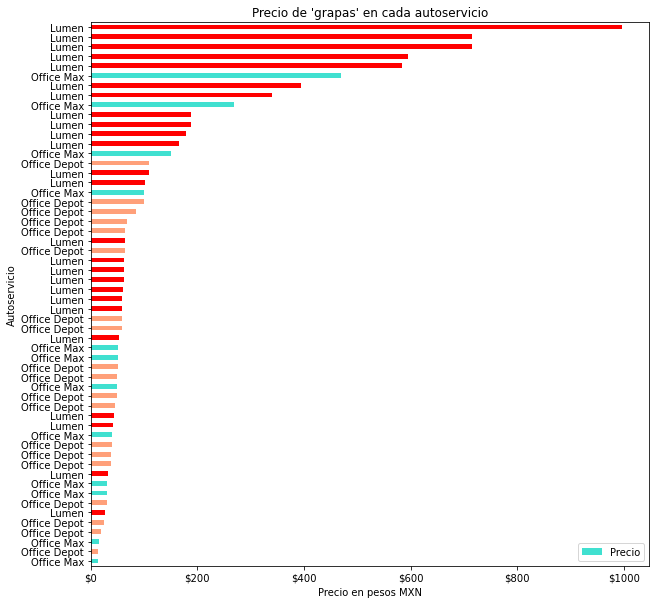

In [31]:
# GRÁFICA 6. PRECIO GRAPAS
sql6 = ps.sqldf(
    "select marca, autoservicio, precio_original as 'Precio' \
        from df_final where (marca='grapas' and precio_original \
                             is not null) order by precio_original")
sql6
colores = []
for i in sql6["autoservicio"]:
    if i =="Lumen":
        colores.append("r")
    elif i =="Office Depot":
        colores.append("lightsalmon")
    elif i == "Office Max":
        colores.append("turquoise")
grafica6 = sql6.plot("autoservicio", "Precio", 
                     kind="barh", color=colores)
plt.title("Precio de 'grapas' en cada autoservicio")
plt.ylabel("Autoservicio")
plt.xlabel("Precio en pesos MXN")
plt.xticks([0,200,400,600,800,1000],
           ["$0","$200","$400","$600","$800", "$1000"])
plt.rcParams["figure.figsize"] = (10,10)
plt.show()


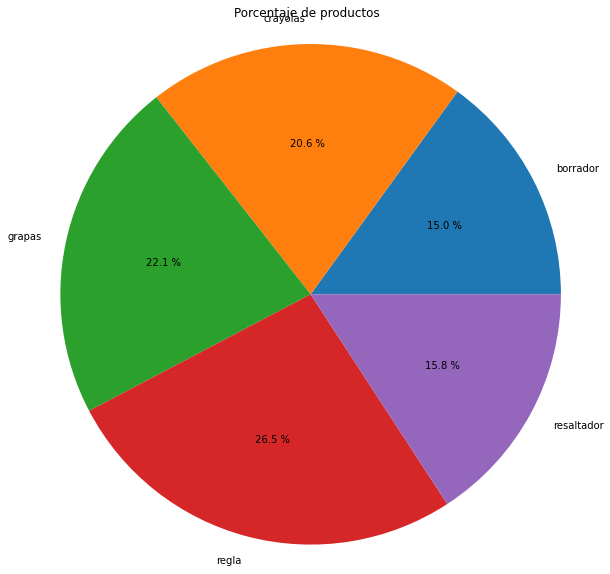

In [32]:
# GRÁFICA 7. CANTIDAD DE ARTÍCULOS
sql7=ps.sqldf(
    "select marca,count(*) \
        from df_final \
            group by marca")
plt.pie(sql7["count(*)"], labels=sql7["marca"], autopct="%0.1f %%")
plt.axis("equal")
plt.title("Porcentaje de productos")
plt.show()

##Consultas SQL

In [44]:
# 1. Nombre de los productos de mayor precio en Office Max por marca
ps.sqldf(
    "select marca,nombre,MAX(precio_original) as preciomaximo  from df_final where (autoservicio='Office Max') group by marca")

,marca,nombre,preciomaximo
0,borrador,Borrador Tipo Lápiz Clic Eraser Ii Colores Con...,139.0
1,crayolas,CRAYONES CRAYOLA JUMBO BOTE 28,119.0
2,grapas,CAJA SANSON Caja 68Lt c/grapas CLARIFICADA,469.0
3,regla,"Regla T Madera,Maped Cabeza Fija 2 Espigas 100...",489.0
4,resaltador,Resaltador Marcador Sharpie S-NOTE C12,241.0


In [45]:
# 2. Nombre de los productos de mayor precio en Lumen por marca
ps.sqldf(
    "select marca,nombre,MAX(precio_original) as preciomaximo  from df_final where (autoservicio='Lumen') group by marca")

,marca,nombre,preciomaximo
0,borrador,MARCADORES PARA PIZARRÓN BIC WHITEBOARD BLIS ...,87.0
1,crayolas,CRAYONES PAPER MATE FANTASY GEL CON 12,170.0
2,grapas,ENGRAPADORA RIHAN DE BRAZO LARGO,997.0
3,regla,REGLA PARALELA DEVAL 120 CM,950.0
4,resaltador,MINAS EMG 5.5MM RESALTADOR PAQUETE CON 6,249.0


In [46]:
# 3. Los precios originales de los productos de lumen que estan entre 50 y 100 pesos
ps.sqldf(
    "select * from df_lumen where precio_original between 50 and 100")

,fecha,autoservicio,marca,nombre,url,precio_promocion,precio_original
0,27/01/22,Lumen,crayolas,CRAYONES CRAYOLA 0324 JUMBO CON 24,https://lumen.com.mx/crayones-crayola-0324-jum...,NaN,98.9
1,27/01/22,Lumen,crayolas,CRAYONES CRAYOLA 0712 TWISTABLES MINI CON 12,https://lumen.com.mx/crayones-crayola-0712-twi...,NaN,77.9
2,27/01/22,Lumen,crayolas,CRAYÓNES CRAYOLA 521912 SO BIG 521912 CON 12,https://lumen.com.mx/crayones-crayola-521912-s...,NaN,72.5
3,27/01/22,Lumen,crayolas,CRAYONES MAPED COLOR PEPS GEL CON 6,https://lumen.com.mx/crayones-maped-color-peps...,NaN,69.9
4,27/01/22,Lumen,crayolas,CRAYONES JOVI HEXÁGONALES 912,https://lumen.com.mx/crayones-jovi-hexagonales...,NaN,66.5
5,27/01/22,Lumen,crayolas,CRAYONES CRAYOLA 3024 CON 24,https://lumen.com.mx/crayones-crayola-3024-con...,NaN,51.9
6,27/01/22,Lumen,crayolas,CRAYONES CRAYOLA 4312 TRIANGULARES CON 12,https://lumen.com.mx/crayones-crayola-4312-tri...,NaN,51.9
7,27/01/22,Lumen,crayolas,CRAYONES MAPED COLOR PEPS JUMBO CON 12,https://lumen.com.mx/crayones-maped-color-peps...,NaN,51.0
8,27/01/22,Lumen,crayolas,CRAYONES CRAYOLA JUMBO CON 12,https://lumen.com.mx/crayones-crayola-jumbo-co...,NaN,50.9
9,27/01/22,Lumen,crayolas,CRAYONES FABER-CASTELL JUMBO CAJA CON 12,https://lumen.com.mx/crayones-faber-castell-ju...,NaN,66.9


In [47]:
# 4. Los precios originales de los productos de office max que estan entre 100 y 300 pesos ordenados de menor a mayor
ps.sqldf(
    "select * from df_officemax where precio_original between 100 and 300 order by precio_original")

,fecha,autoservicio,marca,nombre,url,precio_promocion,precio_original
0,27/01/22,Office Max,borrador,Borrador Staedtler Con Repuesto,https://www.officemax.com.mx/borrador-staedtle...,None,103.5
1,27/01/22,Office Max,crayolas,CRAYONES CRAYOLA JUMBO BOTE 28,https://www.officemax.com.mx/crayones-crayola-...,None,119.0
2,27/01/22,Office Max,borrador,Marcadores Para Pizarron Expo y Borrador 4 Piezas,https://www.officemax.com.mx/marcadores-para-p...,None,125.0
3,27/01/22,Office Max,regla,Regla T Acrílico Fija Con Graduación 60Cm 1 Pieza,https://www.officemax.com.mx/regla-t-acrilico-...,None,129.0
4,27/01/22,Office Max,regla,"Regla T Acrilico, 60Cm, Cabeza Fija,Grad, Col ...",https://www.officemax.com.mx/regla-t-acrilico-...,None,129.0
5,27/01/22,Office Max,borrador,Borrador Tipo Lápiz Clic Eraser Ii Colores Con...,https://www.officemax.com.mx/borrador-tipo-lap...,None,139.0
6,27/01/22,Office Max,grapas,ENGRAPADORA PILOT STAND UPTIRA COMP,https://www.officemax.com.mx/engrapadora-pilot...,None,150.0
7,27/01/22,Office Max,resaltador,Resaltador Marcador Sharpie S-NOTE C12,https://www.officemax.com.mx/resaltador-marcad...,None,241.0
8,27/01/22,Office Max,grapas,CAJA AGATA Caja 36Lt c/grapas CLARIFICADA,https://www.officemax.com.mx/caja-agata-caja-3...,None,269.0


In [48]:
# 5. Los precios originales de los productos de office depot que estan entre 50 y 300 pesos ordenados de menor a mayor
ps.sqldf(
    "select * from df_officedepot where precio_original between 50 and 300 order by precio_original")

,fecha,autoservicio,marca,nombre,url,precio_promocion,precio_original
0,27/01/22,Office Depot,grapas,"GRAPAS BOSTITCH SB355/8-1M (15 MM, 1000 PZS.)",https://www.officedepot.com.mx/officedepot/en/...,NaN,50.0
1,27/01/22,Office Depot,borrador,"MARCADOR AZOR MAGISTRAL + BORRADOR (NEGRO, 1 P...",https://www.officedepot.com.mx/officedepot/en/...,NaN,50.0
2,27/01/22,Office Depot,resaltador,MARCATEXTOS AZOR VISION JUNIOR PASTEL (COLORES...,https://www.officedepot.com.mx/officedepot/en/...,NaN,50.0
3,27/01/22,Office Depot,resaltador,"MARCATEXTOS PELIKAN CITY HIGHLIGHTER (COLORES,...",https://www.officedepot.com.mx/officedepot/en/...,35.35,50.5
4,27/01/22,Office Depot,grapas,"GRAPAS BOSTITCH SB351/2-1M (12 MM, 1000 PZS.)",https://www.officedepot.com.mx/officedepot/en/...,NaN,51.9
5,27/01/22,Office Depot,grapas,GRAPAS PHD BOSTITCH PARA USO RUDO,https://www.officedepot.com.mx/officedepot/en/...,NaN,57.9
6,27/01/22,Office Depot,grapas,GRAPAS STANLEY DE USO PESADO 1/4 CON 1000 PIEZAS,https://www.officedepot.com.mx/officedepot/en/...,NaN,58.0
7,27/01/22,Office Depot,borrador,"MARCADORES + BORRADOR RED TOP (COLORES, 3 PZS.)",https://www.officedepot.com.mx/officedepot/en/...,NaN,59.0
8,27/01/22,Office Depot,resaltador,MARCATEXTOS OFFICE DEPOT (6 PZS.),https://www.officedepot.com.mx/officedepot/en/...,NaN,59.0
9,27/01/22,Office Depot,resaltador,MARCATEXTOS PELIKAN PASTEL HIGHLIGHTER (COLORE...,https://www.officedepot.com.mx/officedepot/en/...,NaN,59.0


In [49]:
# 6. Promedio del precio de cada producto
ps.sqldf(
    "select marca,avg(precio_original) as PrecioPromedio from df_final group by marca order by marca")

,marca,PrecioPromedio
0,borrador,51.350000
1,crayolas,79.907692
2,grapas,145.741071
3,regla,162.292537
4,resaltador,85.232500


In [50]:
# 7. Cantidad de artículos por marca
ps.sqldf(
    "select marca,count(*) as CantidadDeArticulosPorMarca from df_final group by marca")

,marca,CantidadDeArticulosPorMarca
0,borrador,38
1,crayolas,52
2,grapas,56
3,regla,67
4,resaltador,40


In [51]:
# 8. Productos en los cuales se descuenta $100 o más
ps.sqldf(
    "select marca, nombre,precio_original, precio_promocion from df_final where(precio_original>precio_promocion+100)")

,marca,nombre,precio_original,precio_promocion
0,regla,REGLA PARALELA DEVAL 120 CM,950.0,760.0
1,regla,"REGLA T STAEDTLER MARS (MADERA, 91.4 CM)",769.0,461.4


In [52]:
# 9. Productos en los cuales se descuenta 30% o más
ps.sqldf(
    "select marca, nombre, precio_original, precio_promocion \
        from df_final where(precio_promocion<=precio_original*0.7)")

,marca,nombre,precio_original,precio_promocion
0,grapas,DESENGRAPADORA DE USO RUDO SWINGLINE P6778,102.0,61.20
1,regla,REGLA PROFESIONAL K+E CON COJINES ANTIDESLIZ ...,140.0,98.00
2,borrador,"BORRADOR CON SACAPUNTAS TICHER (COLORES, 1 PZ.A)",19.0,3.80
3,borrador,BORRADOR MAGNÉTICO PARA PIZARRÓN BLANCO A-INK ...,18.0,1.80
4,borrador,BORRADOR CON SACAPUNTAS MILAN CAPSULE SILVER (...,75.0,52.50
5,borrador,BORRADOR CON SACAPUNTAS MILAN COMPACT SUNSET (...,79.0,55.30
6,resaltador,"MARCATEXTOS DOBLE PUNTA RED TOP (COLORES, 2 PZS.)",49.0,14.70
7,regla,"REGLA T STAEDTLER MARS (MADERA, 91.4 CM)",769.0,461.40
8,regla,"LUPA REGLA MAPED 395110 (25 CM, 1 PZA.)",95.0,28.50
9,grapas,Grapa Para Engrapadora De Pared Stanley Bostic...,49.9,24.95


In [53]:
# 10. Cantidad de productos con el 50% o más de descuento
ps.sqldf(
    "select marca,count(*) as CantidadDeProductosPorMarca \
        from df_final where (precio_promocion<=precio_original*0.5) \
            group by marca")

,marca,CantidadDeProductosPorMarca
0,borrador,2
1,grapas,1
2,regla,1
3,resaltador,1
